In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/languageDetection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

Accuracy: 0.9742086752637749


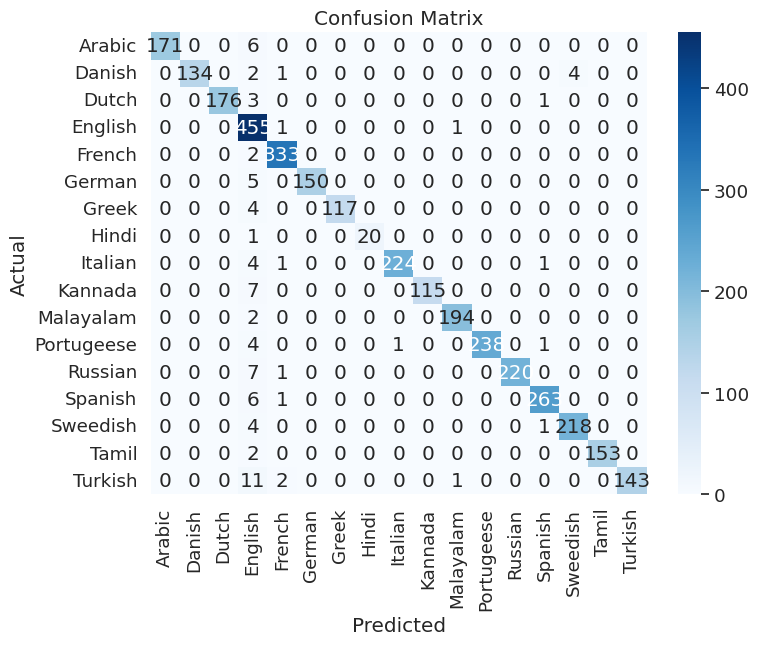

Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.97      0.98       177
      Danish       1.00      0.95      0.97       141
       Dutch       1.00      0.98      0.99       180
     English       0.87      1.00      0.93       457
      French       0.98      0.99      0.99       335
      German       1.00      0.97      0.98       155
       Greek       1.00      0.97      0.98       121
       Hindi       1.00      0.95      0.98        21
     Italian       1.00      0.97      0.98       230
     Kannada       1.00      0.94      0.97       122
   Malayalam       0.99      0.99      0.99       196
  Portugeese       1.00      0.98      0.99       244
     Russian       1.00      0.96      0.98       228
     Spanish       0.99      0.97      0.98       270
    Sweedish       0.98      0.98      0.98       223
       Tamil       1.00      0.99      0.99       155
     Turkish       1.00      0.91      0.95       157

   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["Text"],
                                                    data["Language"],
                                                    test_size=0.33,
                                                    stratify=data["Language"],
                                                    random_state=42)

# Vectorize the texts using CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size as needed
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


In [ ]:
# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9742086752637749
Classification report:
               precision    recall  f1-score   support

      Arabic       1.00      0.97      0.98       177
      Danish       1.00      0.95      0.97       141
       Dutch       1.00      0.98      0.99       180
     English       0.87      1.00      0.93       457
      French       0.98      0.99      0.99       335
      German       1.00      0.97      0.98       155
       Greek       1.00      0.97      0.98       121
       Hindi       1.00      0.95      0.98        21
     Italian       1.00      0.97      0.98       230
     Kannada       1.00      0.94      0.97       122
   Malayalam       0.99      0.99      0.99       196
  Portugeese       1.00      0.98      0.99       244
     Russian       1.00      0.96      0.98       228
     Spanish       0.99      0.97      0.98       270
    Sweedish       0.98      0.98      0.98       223
       Tamil       1.00      0.99      0.99       155
     Turkish       1.00     

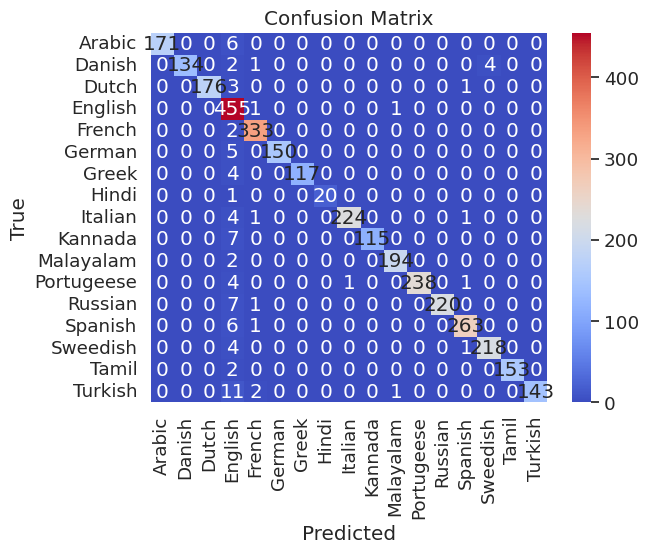

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Choose a color palette from Seaborn
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a heatmap using Seaborn with the chosen color palette
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap,
            xticklabels=model.classes_, yticklabels=model.classes_)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Define the text string to predict
user_text = "Cómo estás"

# Vectorize the text string using the trained CountVectorizer
user_data = cv.transform([user_text])

# Make the prediction
prediction = model.predict(user_data)

# Get the predicted language label
predicted_language = prediction[0]

# Print the prediction result
print("The detected language is:", predicted_language)

The detected language is: Spanish
